# 数据预处理

In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import metrics
# import matplotlib

df = pd.read_csv('.\dataset_diabetes\diabetic_data.csv')
# hist识别哪些列为数值属性
# df.hist()

# 分离数值属性与名义属性
num_columns = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
allcolumns = df.columns.values.tolist()
nor_columns = list(set(allcolumns)-set(num_columns))

# 仅保留病人第一次入院数据
df = df.sort_values(by=['encounter_id'],ascending=True)
df = df.drop_duplicates(subset=['patient_nbr'])

# 删去死亡与转到临终关怀医院的数据
expired = {11,13,14,19,20,21}  # 死亡或转至临终关怀医院对应的discharge_disposition_id
dropID = []
for value in df.index.values:
    if df.loc[value,'discharge_disposition_id'] in expired:
        dropID.append(value)
df = df.drop(dropID)      # 去除死亡或转至临终关怀医院的病人
label = df['readmitted'].values.tolist()  # 给定标签方便后续算法评估

# 去除某属性占比较高的特征
dropColumn = ['weight','payer_code','readmitted','encounter_id', 'patient_nbr']
for column in df.columns.values:
    count = Counter(df.loc[:,column])
    ratio = count.most_common()[0][1] / sum(count.values())
    if ratio >= 0.95 and not column in dropColumn:    # 单个属性占比90%时删除
        dropColumn.append(column)
df = df.drop(dropColumn,axis=1)
# 更新删除特征后的名义属性与数值属性
num_columns = list(set(num_columns)-set(dropColumn))
allcolumns = df.columns.values.tolist()
nor_columns = list(set(allcolumns)-set(num_columns))

# labelencoder将名义属性转为数值
enc = preprocessing.LabelEncoder()
for column in nor_columns:
    df.loc[:,column]=enc.fit_transform(df.loc[:,column])
label = enc.fit_transform(label)

# 数据归一化
# scaler = preprocessing.MinMaxScaler()
# df = scaler.fit_transform(df)   # 数据类型变为ndarray，不会画图了。。
for column in allcolumns:   # 保持数据类型为dataframe方便后面用.plot画图。。
    if df.loc[:,column].min()==df.loc[:,column].max():  #避免单值属性计算出bug
        df.loc[:,column] = 0
    else:
        df.loc[:,column] = (df.loc[:,column]-df.loc[:,column].min())/(df.loc[:,column].max()-df.loc[:,column].min())

# # 直方图看数据分布情况
# fig,axes = plt.subplots(10,5,constrained_layout = True,figsize=(5*5,10*4))
# df.plot(kind='hist',ax=np.reshape(axes,50)[0:len(allcolumns)],bins=20, subplots=True, title='Histplots')
# for i in range(len(allcolumns),50):    # 去除空子图
#     fig.delaxes(axes.flatten()[i])

C:\Users\LYF\AppData\Local\Temp\ipykernel_16036\48566132.py:48: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,column]=enc.fit_transform(df.loc[:,column])
C:\Users\LYF\AppData\Local\Temp\ipykernel_16036\48566132.py:58: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,column] = (df.loc[:,column]-df.loc[:,column].min())/(df.loc[:,column].max()-df.loc[:,column].min())


# Kmeans

28 维数据投影


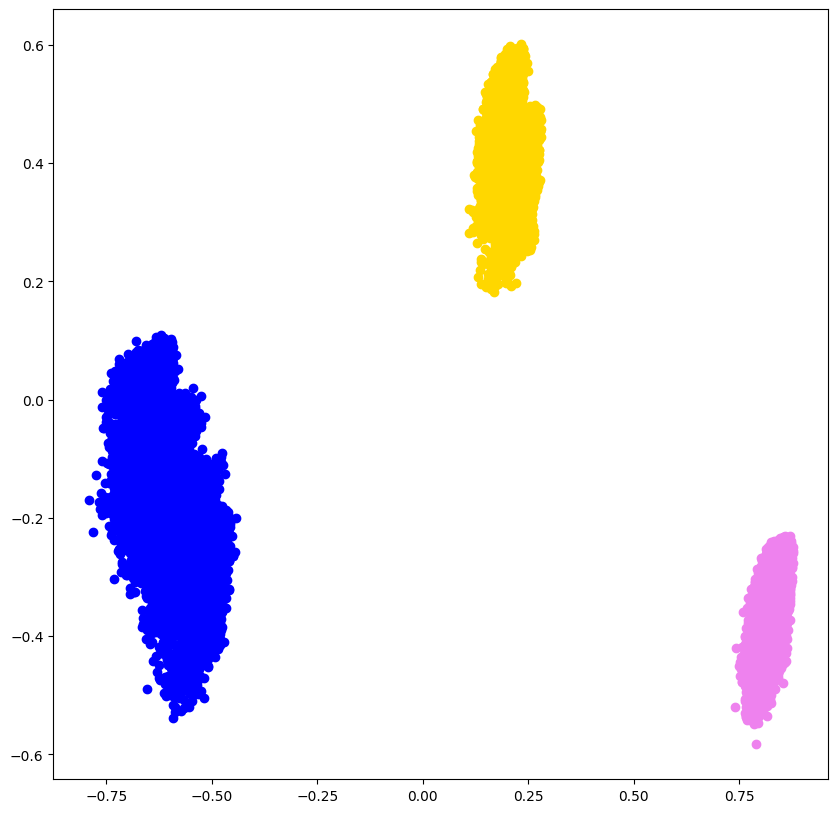


SSE= 96636.72834813931

轮廓系数= 0.2191763501058868

Calinski-Harabasz系数= 19003.862145482944
28 维数据投影


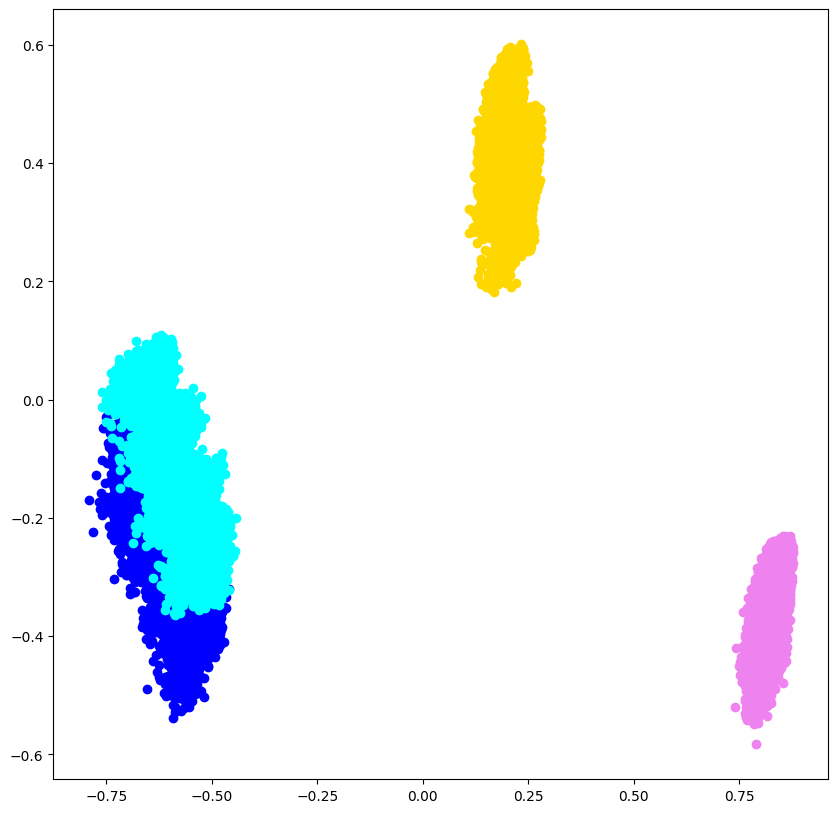


SSE= 86720.71977970735

轮廓系数= 0.188202488017366

Calinski-Harabasz系数= 14231.805221800527
28 维数据投影


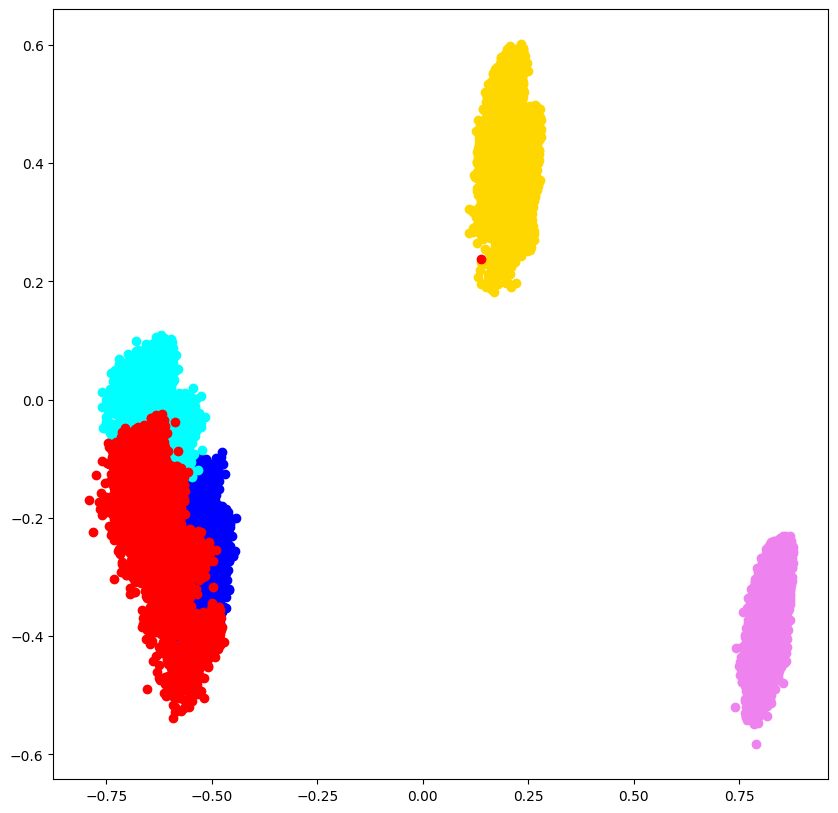


SSE= 95813.57437365364

轮廓系数= 0.18387813513778212

Calinski-Harabasz系数= 12024.67496148697
28 维数据投影


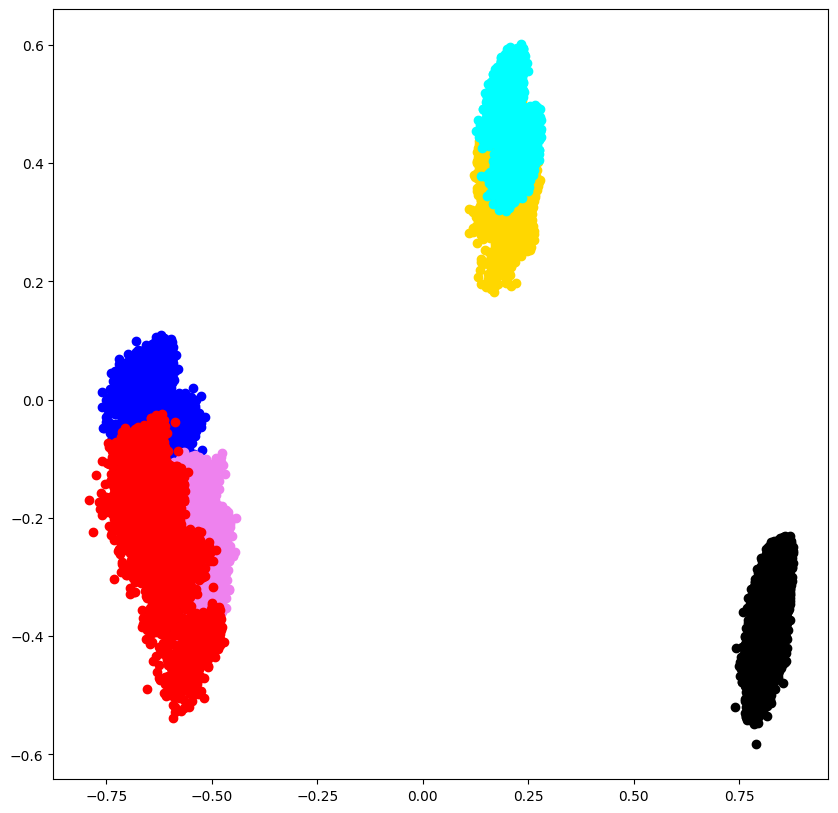


SSE= 96636.72834813931

轮廓系数= 0.14523000804211664

Calinski-Harabasz系数= 10292.472051607492
28 维数据投影


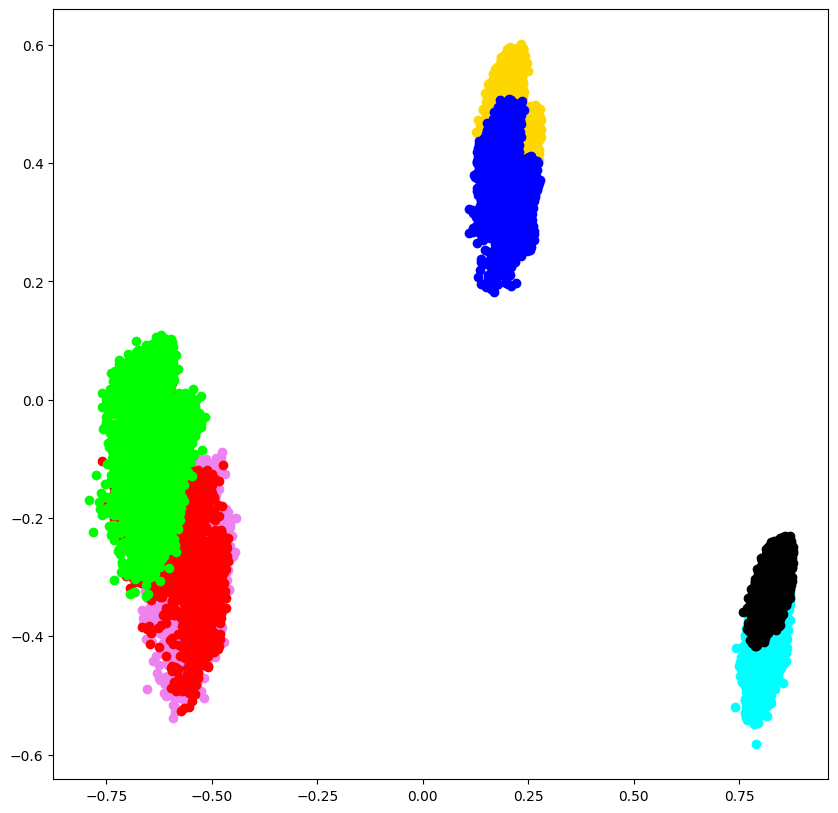


SSE= 89219.76503481575

轮廓系数= 0.11661856662090364

Calinski-Harabasz系数= 8845.539477411901
28 维数据投影


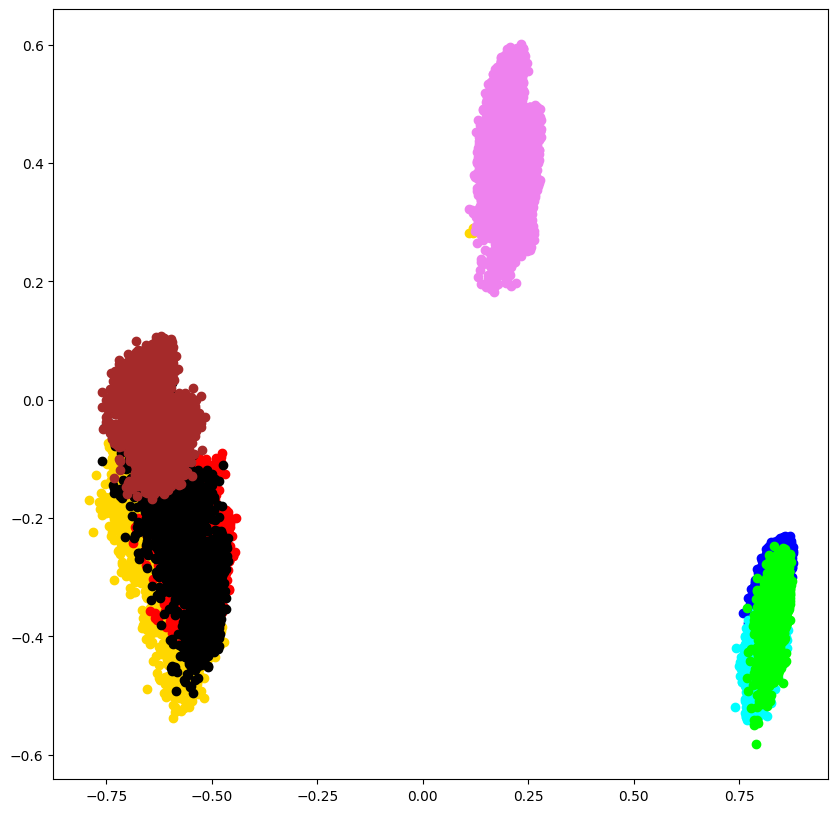


SSE= 89543.81255296634

轮廓系数= 0.1395156614967697

Calinski-Harabasz系数= 7888.656821035379


In [24]:
def distance_fun(p1, p2, N):
    result=0
    for i in range(0,N):
        result=result+((p1[i]-p2[i])**2)
    return np.sqrt(result)

def mean_fun(a):
     return np.mean(a,axis=0)

def farthest(center_arr, arr):
    f = [0, 0]
    max_d = 0
    for e in arr:
        d = 0
        for i in range(center_arr.__len__()):
            d = d + np.sqrt(distance_fun(center_arr[i], e, N))
        if d > max_d:
            max_d = d
            f = e
    return f

def closest(a, arr):
    c = arr[0]
    min_d = distance_fun(a, arr[0],N)
    arr = arr[0:]
    for e in arr:
        d = distance_fun(a, e, N)
        if d < min_d:
            min_d = d
            c = e
    return c
    
def closest_d(a, arr):
    c = arr[0]
    min_d = distance_fun(a, arr[0],N)
    arr = arr[0:]
    for e in arr:
        d = distance_fun(a, e, N)
        if d < min_d:
            min_d = d
            c = e
    return d

if __name__=="__main__":
    
    
    # arr = np.random.randint(0,10000, size=(1000, 1, N))[:, 0, :]   #1000个0-10000随机数
    '''
    block1=  np.random.randint(0,2000, size=(100, 1, N))[:, 0, :]     #分区间生成随机数
    block2 = np.random.randint(2000,4000, size=(100, 1, N))[:, 0, :]
    block3 = np.random.randint(4000,6000, size=(100, 1, N))[:, 0, :]
    block4 = np.random.randint(6000,8000, size=(100, 1, N))[:, 0, :]
    block5 = np.random.randint(8000,10000, size=(100, 1, N))[:, 0, :]
    arr=np.vstack((block1,block2,block3,block4,block5))
    '''
    for K in range(3,9):
        # K = 3
        # 数据转换    
        df = np.array(df)
        pca = PCA(n_components=2)
        pca_df = pca.fit_transform(df)
        N = len(df[0])                       # 维度
        new_pca_df = np.insert(pca_df, len(pca_df[0]), label, axis=1)
        ## 初始化聚类中心和聚类容器
        r = np.random.randint(df.__len__() - 1)
        center_arr = np.array([df[r]])
        # pca_center = np.array([pca.df[r]])
        cla_arr = [[]]
        pca_arr = [[]]

        for i in range(K-1):
            k = farthest(center_arr, df)
            center_arr = np.concatenate([center_arr, np.array([k])])
            cla_arr.append([])
            pca_arr.append([])

        ## 迭代聚类
        n = 20  # 迭代次数，一般5-10
        cla_temp = cla_arr   # 指针变量？？
        pca_cla = pca_arr
        cluster_label = []

        for i in range(n): 
            index = 0   
            for e in df:    
                ki = 0        
                min_d = distance_fun(e, center_arr[ki],N)
                for j in range(1, center_arr.__len__()):
                    if distance_fun(e, center_arr[j],N) < min_d:    
                        min_d = distance_fun(e, center_arr[j],N)
                        ki = j
                cla_temp[ki].append(e)
                pca_cla[ki].append(new_pca_df[index])    # 准备降维的数据方便可视化
                index = index + 1
                cluster_label.append(ki)

            for k in range(center_arr.__len__()):
                if n - 1 == i:
                    break
                center_arr[k] = mean_fun(cla_temp[k])
                cla_temp[k] = []
                pca_cla[k] = []
                cluster_label = []

        # PCA降维方便可视化
        # pca = PCA(n_components=2)  
        # X_new = pca.fit_transform(X)
        # print(pca.explained_variance_ratio_.sum()) #降维后信息保留量应大于95%
        # if N>=2:
        print(N,'维数据投影') 
        col = ['gold', 'blue', 'violet', 'cyan', 'red','black','lime','brown','silver']
        plt.figure(figsize=(10, 10))
        for i in range(K):
            # plt.scatter(center_arr[i][0], center_arr[i][1], color=col[i])
            plt.scatter([e[0] for e in pca_cla[i]], [e[1] for e in pca_cla[i]], color=col[i])
        plt.show()
        
        # if N>=3:
        #     print(N,'维数据前三维投影')
        #     fig = plt.figure(figsize=(8, 8))
        #     ax = Axes3D(fig)
        #     for i in range(K):
        #         ax.scatter(center_arr[i][0], center_arr[i][1], center_arr[i][2], color=col[i])
        #         ax.scatter([e[0] for e in cla_temp[i]], [e[1] for e in cla_temp[i]],[e[2] for e in cla_temp[i]], color=col[i])
        #     plt.show()
        
        # print(N,'维')
        # for i in range(K):
        #     print('第',i+1,'个聚类中心坐标：')
        #     for j in range(0,N):
        #         print(center_arr[i][j])

        # 计算评估指标SSE
        SSE = 0
        for e in df:
            SSE = SSE + closest_d(e, center_arr)
        print('\nSSE=',SSE)

        # 计算轮廓系数
        lunkuo = metrics.silhouette_score(df, cluster_label , metric='euclidean')
        print('\n轮廓系数=',lunkuo)

        # 计算Calinski-Harabasz系数
        CH_index = metrics.calinski_harabasz_score(df, cluster_label)
        print('\nCalinski-Harabasz系数=',CH_index)
    

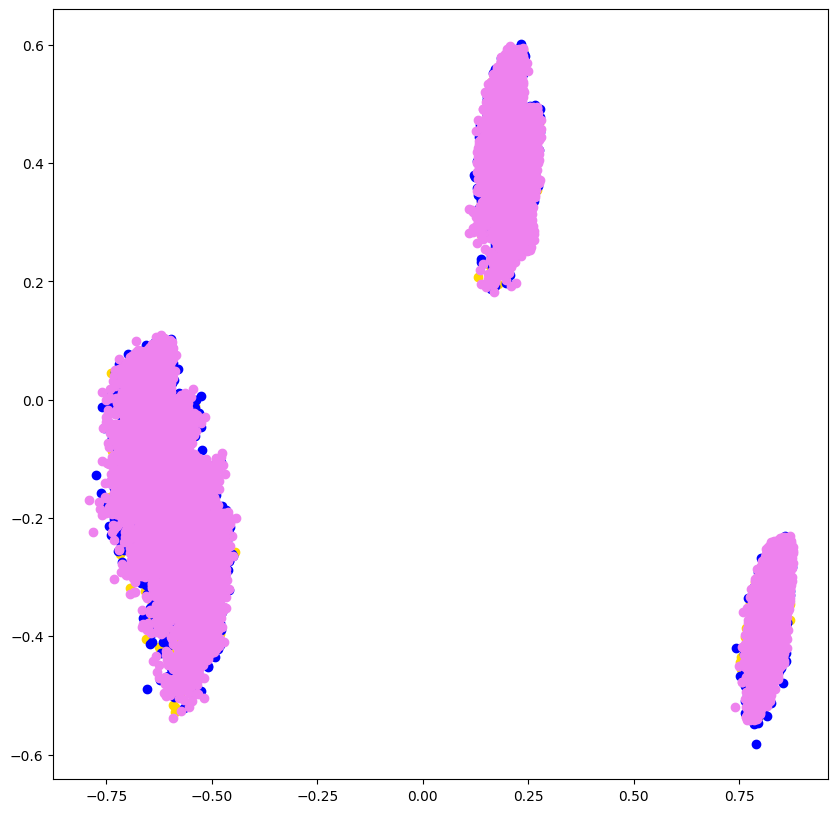

In [22]:
readmitted_cluster = [[],[],[]]
for e in new_pca_df:
    if e[2]==0:
        readmitted_cluster[0].append(e[0:2])
    elif e[2]==1:
        readmitted_cluster[1].append(e[0:2])
    else:
        readmitted_cluster[2].append(e[0:2])
plt.figure(figsize=(10,10))
for i in range(3):
    plt.scatter([e[0] for e in readmitted_cluster[i]], [e[1] for e in readmitted_cluster[i]],color=col[i])
    # print(int(e[2]))
plt.show()   # 各类簇中均包含readmitted的三个属性

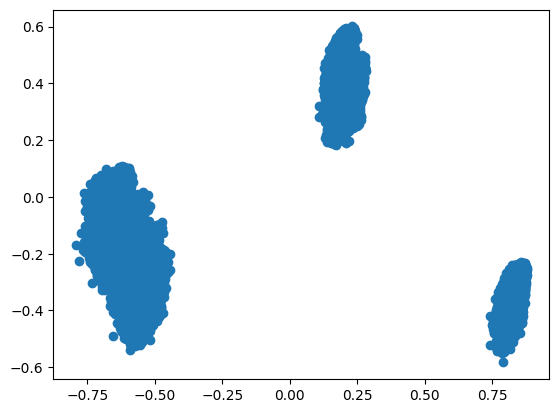

In [16]:
plt.scatter([e[0] for e in new_pca_df],[e[1] for e in new_pca_df])
plt.show()

In [11]:
count_readmitted = np.zeros((3,3))
for i in range(K):
    for e in pca_cla[i]:
        if e[2]==0:
            count_readmitted[i][0] = count_readmitted[i][0]+1
        elif e[2]==1:
            count_readmitted[i][1] = count_readmitted[i][1]+1
        else:
            count_readmitted[i][2] = count_readmitted[i][2]+1
    sum_count = sum(count_readmitted[i])
    count_readmitted[i] = count_readmitted[i]/sum_count
print(count_readmitted)


[[0.09389047 0.32602514 0.5800844 ]
 [0.07547962 0.27817746 0.64634293]
 [0.09434442 0.33260297 0.57305262]]


In [13]:
# 计算轮廓系数
lunkuo = metrics.silhouette_score(X_norm, km.labels_ , metric='euclidean')

TypeError: distance_fun() missing 1 required positional argument: 'N'